In [ ]:
error aa ja

In [42]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
#pd.set_option("display.max_columns",50)

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler
from sklearn.model_selection import cross_val_score,GridSearchCV,StratifiedKFold,RepeatedStratifiedKFold,RandomizedSearchCV
from sklearn.metrics import accuracy_score,auc,recall_score,precision_score,precision_recall_curve,confusion_matrix,\
plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve,classification_report
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import ColumnTransformer

In [44]:
import re
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style="darkgrid") #white, dark, whitegrid, darkgrid, ticks


In [45]:
path = r"C:/Users/Krishna/Documents/kaggle/AV_HR_Hackathon"

In [46]:
train = pd.read_csv(f'{path}/input/train_jqd04QH.csv',dtype = {'enrollee_id':str})
test = pd.read_csv(f'{path}/input/test_KaymcHn.csv',dtype = {'enrollee_id':str})

f'train dimensions are : {train.shape}'
f'test dimensions are : {test.shape}'

train.head(2)
test.head(2)


'train dimensions are : (18359, 14)'

'test dimensions are : (15021, 13)'

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94


In [47]:
def data_info(df = train):
    df_info = pd.DataFrame(df.isna().sum(),columns = ['Null_count'])
    df_info['Non_Null_count'] = df_info.index.map(df.notna().sum())
    df_info['N_unique'] = df_info.index.map(df.nunique())
    df_info['D_types'] = df_info.index.map(df.dtypes)
    df_info['Blank_count'] = df_info.index.map((df=='').sum())
    return df_info

In [48]:
data_info(train)

,Null_count,Non_Null_count,N_unique,D_types,Blank_count
enrollee_id,0,18359,18359,object,0
city,0,18359,123,object,0
city_development_index,0,18359,93,float64,0
gender,4098,14261,3,object,0
relevent_experience,0,18359,2,object,0
enrolled_university,342,18017,3,object,0
education_level,457,17902,5,object,0
major_discipline,2838,15521,6,object,0
experience,59,18300,22,object,0
company_size,4779,13580,8,object,0


### checking event rate 

In [49]:
from collections import Counter
Counter(train.target)
train.target.value_counts(normalize=True) # works for numeric columns too with arguement `bins`
#train.city_development_index.value_counts(bins =6)

Counter({0: 15934, 1: 2425})

0    0.867912
1    0.132088
Name: target, dtype: float64

### treating null values

In [50]:
var = 'gender'
#f'count of NULLs in {var} : {train[[var]].isna().sum()[0]}'
train[var].value_counts(dropna = False)

Male      12884
NaN        4098
Female     1188
Other       189
Name: gender, dtype: int64

Text(0.5, 1.0, 'Count Plot of gender')

target,0,1
gender,,
Female,0.849327,0.150673
Male,0.877523,0.122477
Other,0.846561,0.153439
All,0.874763,0.125237


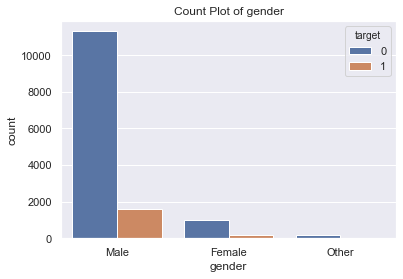

In [51]:
sns.countplot(x= var,hue='target', data = train).set_title(f'Count Plot of {var}');
pd.crosstab(index = train[var], columns = train.target,margins = True,normalize='index',)

In [52]:
#creating a label 'missing' as the null count is very high 
train[var].fillna('unknown',inplace=True)

In [53]:
#http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/DataPresentation/DataPresentation7.html

In [54]:
#enrolled_university  --  Type of University course enrolled if any
var = 'enrolled_university'
#f'count of NULLs in {var} : {train[[var]].isna().sum()[0]}'
train[var].value_counts(dropna = False)

no_enrollment       13659
Full time course     3187
Part time course     1171
NaN                   342
Name: enrolled_university, dtype: int64

Text(0.5, 1.0, 'Count Plot of enrolled_university')

target,0,1
enrolled_university,,
Full time course,0.809539,0.190461
Part time course,0.851409,0.148591
no_enrollment,0.883740,0.116260
All,0.868513,0.131487


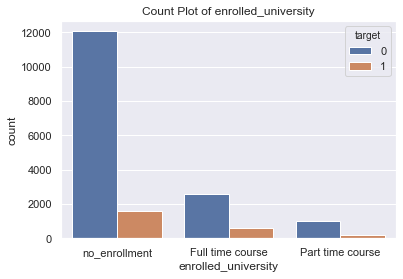

In [55]:
sns.countplot(x=var,hue='target', data = train).set_title(f'Count Plot of {var}');
pd.crosstab(index = train[var], columns = train.target,margins = True,normalize='index',)

In [56]:
#replacing NULLs with modes
train[var].fillna(train[var].mode()[0],inplace=True)

In [57]:
#enrolled_university  --  Type of University course enrolled if any
var = 'education_level'
train[var].value_counts(dropna=False,normalize=True)

Graduate          0.586579
Masters           0.235252
High School       0.110681
Phd               0.025001
NaN               0.024892
Primary School    0.017594
Name: education_level, dtype: float64

Text(0.5, 1.0, 'Count Plot of education_level')

target,0,1,All
education_level,,,
Graduate,9237,1532,10769
High School,1791,241,2032
Masters,3806,513,4319
Phd,406,53,459
Primary School,298,25,323
All,15538,2364,17902


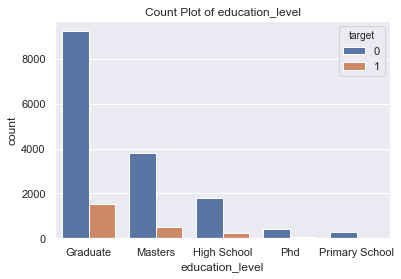

In [58]:
sns.countplot(x=var,hue='target', data = train).set_title(f'Count Plot of {var}');
pd.crosstab(index = train[var], columns = train.target,margins = True)#,normalize='index',)

In [59]:
#replacing NULLs with modes
train[var].fillna('missing',inplace=True)

In [60]:
#enrolled_university  --  Type of University course enrolled if any
var = 'major_discipline'
train[var].value_counts(dropna=False,normalize=True)

STEM               0.748298
NaN                0.154584
Humanities         0.037475
Other              0.018683
Business Degree    0.016722
Arts               0.013018
No Major           0.011221
Name: major_discipline, dtype: float64

Text(0.5, 1.0, 'Count Plot of major_discipline')

target,0,1,All
major_discipline,,,
Arts,214,25,239
Business Degree,268,39,307
Humanities,595,93,688
No Major,186,20,206
Other,306,37,343
STEM,11861,1877,13738
All,15934,2425,18359


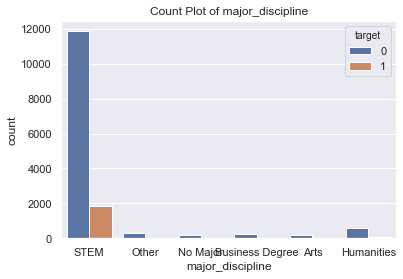

In [61]:
sns.countplot(x=var,hue='target', data = train).set_title(f'Count Plot of {var}');
pd.crosstab(index = train[var], columns = train.target,margins = True,dropna = False)#,normalize='index',)

In [62]:
#replacing NULLs with modes
train[var].fillna('missing',inplace=True)

In [63]:
#enrolled_university  --  Type of University course enrolled if any
var = 'experience'
train[var].value_counts(dropna=False,normalize=True)

>20    0.187211
5      0.071300
4      0.068086
3      0.063130
6      0.061278
2      0.054033
9      0.053325
10     0.052672
7      0.051746
8      0.041124
15     0.037856
11     0.036331
14     0.032790
16     0.029904
12     0.027071
1      0.024620
<1     0.022659
13     0.022441
17     0.018901
19     0.016777
18     0.015578
20     0.007953
NaN    0.003214
Name: experience, dtype: float64

Text(0.5, 1.0, 'Count Plot of experience')

target,0,1
experience,,
1,0.761062,0.238938
10,0.875905,0.124095
11,0.875562,0.124438
12,0.895372,0.104628
13,0.883495,0.116505
14,0.875415,0.124585
15,0.889209,0.110791
16,0.896175,0.103825
17,0.902017,0.097983


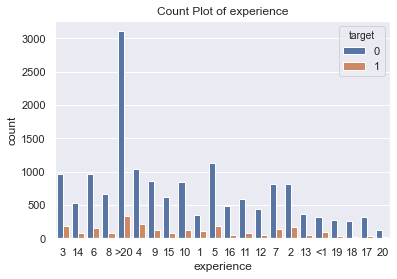

In [64]:
sns.countplot(x=var,hue='target', data = train).set_title(f'Count Plot of {var}');
pd.crosstab(index = train[var], columns = train.target,margins = True,dropna = False,normalize='index',)

In [65]:
#replacing NULLs with modes
train[var].fillna(train[var].mode()[0],inplace=True)

### on similar note imputing NAs for below variables

In [67]:
train.fillna({'company_size' : 'missing', 'company_type' : 'missing', 'last_new_job' : train.last_new_job.mode()[0]},inplace = True)

In [68]:
data_info(train)

,Null_count,Non_Null_count,N_unique,D_types,Blank_count
enrollee_id,0,18359,18359,object,0
city,0,18359,123,object,0
city_development_index,0,18359,93,float64,0
gender,0,18359,4,object,0
relevent_experience,0,18359,2,object,0
enrolled_university,0,18359,3,object,0
education_level,0,18359,6,object,0
major_discipline,0,18359,7,object,0
experience,0,18359,22,object,0
company_size,0,18359,9,object,0


In [71]:
train.to_csv(f'{path}/train_null_rem.csv',index= False)

<center><b> ***THE END** </center></b>

In [81]:
for i in train.drop('enrollee_id',axis = 1).columns:
    train[i].unique()

array(['city_149', 'city_83', 'city_16', 'city_64', 'city_100', 'city_21',
       'city_114', 'city_103', 'city_97', 'city_160', 'city_65',
       'city_90', 'city_75', 'city_136', 'city_159', 'city_67', 'city_28',
       'city_10', 'city_73', 'city_76', 'city_104', 'city_27', 'city_30',
       'city_61', 'city_99', 'city_41', 'city_142', 'city_9', 'city_116',
       'city_128', 'city_74', 'city_69', 'city_1', 'city_176', 'city_40',
       'city_123', 'city_152', 'city_165', 'city_89', 'city_36',
       'city_44', 'city_46', 'city_45', 'city_134', 'city_93', 'city_180',
       'city_162', 'city_84', 'city_138', 'city_173', 'city_19',
       'city_71', 'city_158', 'city_23', 'city_102', 'city_105',
       'city_91', 'city_11', 'city_13', 'city_57', 'city_20', 'city_14',
       'city_37', 'city_115', 'city_50', 'city_167', 'city_12',
       'city_143', 'city_126', 'city_77', 'city_101', 'city_150',
       'city_179', 'city_107', 'city_175', 'city_146', 'city_98',
       'city_166', 'city

array([0.689, 0.923, 0.91 , 0.666, 0.887, 0.624, 0.926, 0.92 , 0.925,
       0.802, 0.698, 0.939, 0.897, 0.843, 0.855, 0.895, 0.754, 0.924,
       0.848, 0.913, 0.915, 0.827, 0.727, 0.743, 0.527, 0.579, 0.856,
       0.847, 0.764, 0.776, 0.738, 0.903, 0.893, 0.725, 0.762, 0.89 ,
       0.865, 0.767, 0.836, 0.878, 0.682, 0.884, 0.766, 0.899, 0.804,
       0.794, 0.691, 0.55 , 0.866, 0.796, 0.789, 0.896, 0.921, 0.64 ,
       0.74 , 0.479, 0.83 , 0.558, 0.512, 0.518, 0.735, 0.949, 0.649,
       0.722, 0.625, 0.745, 0.73 , 0.487, 0.555, 0.769, 0.448, 0.647,
       0.795, 0.516, 0.84 , 0.898, 0.775, 0.493, 0.68 , 0.781, 0.763,
       0.563, 0.739, 0.645, 0.556, 0.742, 0.664, 0.788, 0.78 , 0.824,
       0.807, 0.701, 0.693])

array(['Male', 'unknown', 'Female', 'Other'], dtype=object)

array(['Has relevent experience', 'No relevent experience'], dtype=object)

array(['no_enrollment', 'Full time course', 'Part time course'],
      dtype=object)

array(['Graduate', 'Masters', 'High School', 'Phd', 'missing',
       'Primary School'], dtype=object)

array(['STEM', 'Other', 'No Major', 'missing', 'Business Degree', 'Arts',
       'Humanities'], dtype=object)

array(['3', '14', '6', '8', '>20', '4', '9', '15', '10', '1', '5', '16',
       '11', '12', '7', '2', '13', '<1', '19', '18', '17', '20'],
      dtype=object)

array(['100-500', '<10', '50-99', 'missing', '5000-9999', '10000+',
       '1000-4999', '500-999', '10/49'], dtype=object)

array(['Pvt Ltd', 'Funded Startup', 'Public Sector', 'missing',
       'Early Stage Startup', 'NGO', 'Other'], dtype=object)

array(['1', '2', '3', '>4', 'never', '4'], dtype=object)

array([106,  69,   4,  26,  88,  34,  23,   8,  10,  85,  55,  13,  51,
        28,  35,  42,  45,  11,  12,  54,  89,  41, 298, 101, 114, 104,
        53,  39,  20, 109,   3,  68, 262,  16,  22,  67,  43,   7,  30,
         9, 112,  21, 166, 110,  18,  79,  98,  65,  61,  44, 170, 132,
       145,  48,  46,  37,  86,  96,  33, 152, 168, 128, 102,   6,  50,
        36,  90, 164,  56,  32,  17, 126,  72,  15,  80,  25,  31, 160,
        66,  24, 200,  47,  83,  58,  29, 206,  14, 105,  91, 218,  75,
        57,  19, 144,  92,  94, 184,  62, 140,  52, 258, 178, 270, 108,
       157, 156, 123,  59,  82,  60,   2, 196,  95,  84,   5, 146, 202,
       100, 111, 254,  27, 336,  64, 107,  76,  38, 134, 330, 204, 320,
        74,  73,  40,  87, 316, 118, 122, 282, 248, 153, 147,  70, 131,
       113, 216, 292,  81, 176,  78, 222, 163,  63, 280, 210, 294, 264,
       155,  77,  97, 224, 180, 236, 125, 162, 116, 158, 256,  49,  71,
       326,   1, 238, 124, 268, 214, 192, 232, 276, 165, 138, 31

array([0, 1], dtype=int64)

In [80]:
train.drop('enrollee_id',axis = 1).apply(pd.Series.unique)

ValueError: arrays must all be same length

In [69]:
train.company_type.unique()
pd.crosstab(train.company_size, train.company_type,dropna=False)

array(['Pvt Ltd', 'Funded Startup', 'Public Sector', 'missing',
       'Early Stage Startup', 'NGO', 'Other'], dtype=object)

company_type,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd,missing
company_size,,,,,,,
10/49,168,208,33,10,40,905,102
100-500,22,226,183,21,170,1916,160
1000-4999,0,0,77,15,180,1064,63
10000+,0,0,41,17,158,1752,76
50-99,99,399,80,18,124,2177,223
500-999,2,51,35,11,93,644,66
5000-9999,0,0,31,9,89,428,34
<10,288,149,32,11,40,775,65
missing,3,5,22,7,102,390,4250


In [30]:
#enrolled_university  --  Type of University course enrolled if any
var = 'company_size'
train[var].value_counts(dropna=False)

missing      4779
50-99        3120
100-500      2698
10000+       2044
10/49        1466
1000-4999    1399
<10          1360
500-999       902
5000-9999     591
Name: company_size, dtype: int64

In [31]:
train[var].value_counts()

missing      4779
50-99        3120
100-500      2698
10000+       2044
10/49        1466
1000-4999    1399
<10          1360
500-999       902
5000-9999     591
Name: company_size, dtype: int64

In [32]:
cdi_bands,bins = pd.qcut(train.city_development_index, q = 6,retbins= True,duplicates = 'drop')
train['cdi_bands'] = cdi_bands
#train.groupby(cdi_bands).city.count()
train.groupby(cdi_bands).target.sum()/train.groupby(cdi_bands).target.count()
train.drop('cdi_bands', axis = 1,inplace=True)

In [33]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,unknown,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,unknown,No relevent experience,no_enrollment,Masters,STEM,8,missing,missing,2,88,1


In [34]:
train.groupby('company_size').target.sum()/train.groupby('company_size').target.count()

company_size
10/49        0.134379
100-500      0.103781
1000-4999    0.109364
10000+       0.120841
50-99        0.100321
500-999      0.116408
5000-9999    0.125212
<10          0.107353
missing      0.190416
Name: target, dtype: float64

In [35]:
train.company_size

0        100-500
1            <10
2          50-99
3          50-99
4        missing
          ...   
18354        <10
18355      50-99
18356      50-99
18357      10/49
18358    100-500
Name: company_size, Length: 18359, dtype: object

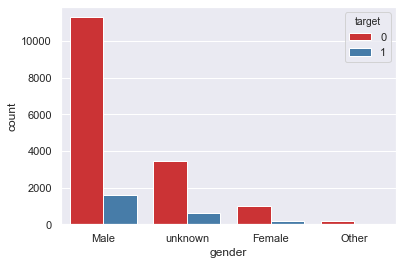

In [36]:
sns.countplot(x = 'gender', hue = 'target', data = train,palette="Set1");

In [37]:
def crosstab_2var(df,var1,var2):
    return(pd.crosstab([df[var1], df["target"]], df[var2], margins = True).style.background_gradient(cmap = "Accent"))

In [38]:
crosstab_2var(train,'gender','company_size')

In [39]:
train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

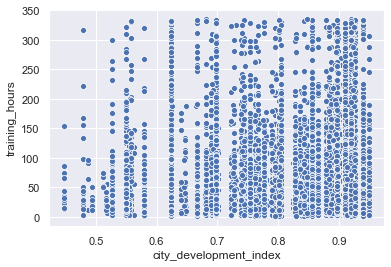

In [40]:
sns.scatterplot(x = train.city_development_index, y = train.training_hours)

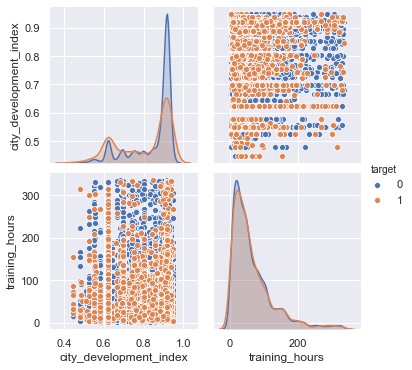

In [41]:
sns.pairplot(train.select_dtypes('number'), hue = 'target')